# Earthquake

https://www.nature.com/articles/ngeo2796

http://rspl.royalsocietypublishing.org/content/61/369-377/455

In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time 
import ephem

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read
filename = "./java_past20years_gt4.5.csv"
#filename = "lombok_02.csv"
data = pd.read_csv(filename)

data[-5:]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3241,1998-02-06T21:55:28.470Z,-6.007,105.519,33.0,5.0,mb,NaN,NaN,NaN,1.11,...,2014-11-07T01:04:30.347Z,"Sunda Strait, Indonesia",earthquake,NaN,NaN,NaN,16.0,reviewed,us,us
3242,1998-02-05T21:40:14.360Z,-7.563,120.115,406.8,4.5,mb,NaN,NaN,NaN,1.10,...,2014-11-07T01:04:29.899Z,Flores Sea,earthquake,NaN,4.7,NaN,11.0,reviewed,us,us
3243,1998-01-17T23:44:31.820Z,-6.249,103.955,33.0,4.6,mb,NaN,NaN,NaN,0.82,...,2014-11-07T01:04:20.966Z,"southwest of Sumatra, Indonesia",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
3244,1998-01-07T21:50:07.250Z,-7.291,106.647,68.6,4.9,mb,NaN,NaN,NaN,1.33,...,2014-11-07T01:04:18.020Z,"Java, Indonesia",earthquake,NaN,12.4,NaN,13.0,reviewed,us,us
3245,1998-01-02T07:42:52.680Z,-4.900,102.757,33.0,4.9,mb,NaN,NaN,NaN,1.18,...,2014-11-07T01:04:15.756Z,"southern Sumatra, Indonesia",earthquake,NaN,NaN,NaN,3.0,reviewed,us,us


In [3]:
time   = data['time']
lat = data['latitude']
lon = data['longitude']
mag = data['mag']

In [4]:
time[0]

'2018-08-29T04:51:15.190Z'

## Filtering

In [5]:
limit = 2.5
mag_lim = mag[mag >= limit]
time_lim = time[mag >= limit]
lat_lim = lat[mag >= limit]
lon_lim = lon[mag >= limit]

In [6]:
t = Time(time_lim.tolist(), format='isot', scale='utc') # input to astropy
t_jd = t.jd # convert to JD

In [7]:
mag=mag_lim

In [8]:
# t = Time(time.tolist(), format='isot', scale='utc') # input to astropy
# t_jd = t.jd

## Time vs Mag

Text(0,0.5,'Magnitude')

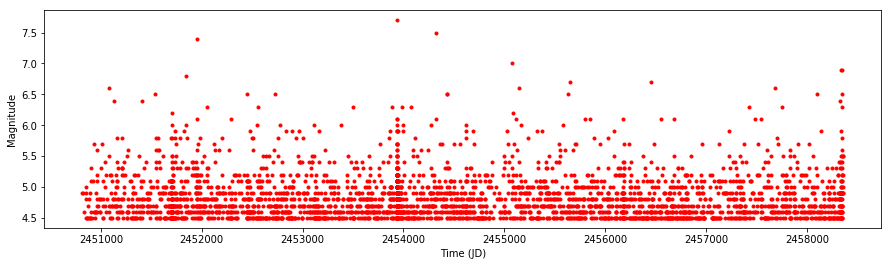

In [9]:
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(t_jd, mag, 'r.', alpha=1.0)
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

# #make some vertical lines around the time of perihelion and aphelion
# for i in range(2):
#     peri = t_jd[-1] + i*365.25
#     aphe = t_jd[-1] + 182.625 + i*365.25
#     plt.axvline(x=peri, linewidth=1.0, color='black')
#     plt.axvline(x=aphe, linewidth=0.5, linestyle='dashdot', color="blue")

In [10]:
# t_folded = (t_jd - t_jd[0])  % 365.26

# theta = t_folded/365.26 * 2 * np.pi

# fig = plt.figure(figsize=(7,7))
# ax = plt.subplot(111, projection='polar')
# ax.plot(theta, mag, 'ro', alpha=1.0) # magnitude as radius
# ax.set_rmin(4.0)
# ax.set_rmax(9.0)
# ax.grid(True)
# plt.show()

### Moon

In [11]:
longitude = (116.818 + 115.752) / 2
latitude = (-9.871 + -7.264) / 2

gatech = ephem.Observer()

gatech.lon = str(longitude)
gatech.lat = str(latitude)
gatech.elevation = 0

In [30]:
alt = [] 
az = []
phase = []
angleToSun = []
earthdist = []

for ti in t:
    x = ti.datetime
    tformat = "{0}/{1}/{2} {3}:{4}:{5}".format(x.year, x.month, x.day, x.hour, x.minute, x.second)
    gatech.date = tformat
    #gatech.date = '1984/5/30 16:22:56'

    mo = ephem.Moon(gatech)
    sun = ephem.Sun(gatech)
    
    #print(gatech.lon, gatech.lat, gatech.date)
    alt.append(mo.alt) 
    az.append(mo.az)
    phase.append(mo.phase)
    angleToSun.append(ephem.separation(sun, mo))
    earthdist.append(mo.earth_distance)
    
    
alt = np.array(alt)
az = np.array(az)
phase = np.array(phase)
angleToSun = np.array(angleToSun)
earthdist = np.array(earthdist)

## Alt vs Magnitude

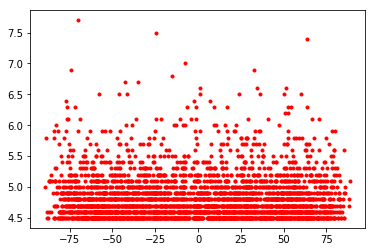

In [13]:
plt.plot(alt*180/np.pi, mag, 'r.')

## Azimuth vs Magnitude

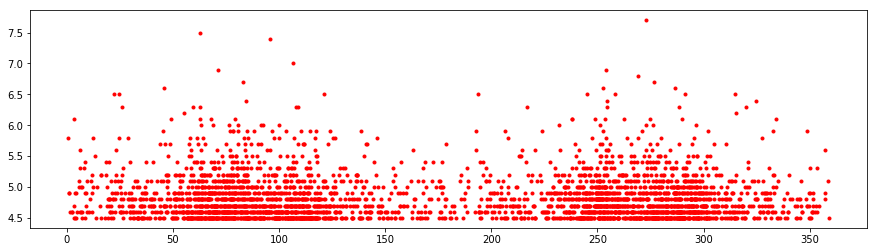

In [14]:
fig = plt.figure(figsize=(15,4))
plt.plot(az[:-1]*180/np.pi, mag[:-1], 'r.')

## Time vs Altitude

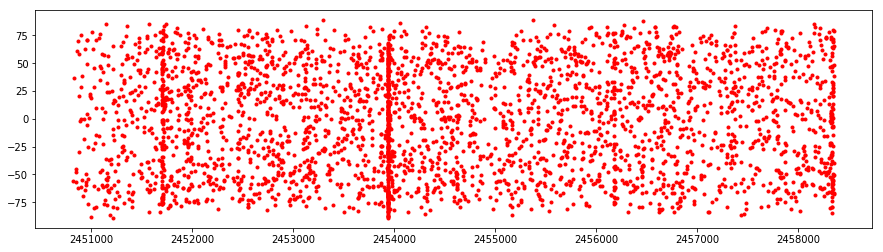

In [15]:
fig = plt.figure(figsize=(15,4))
plt.plot(t_jd[:-1], alt[:-1]*180/np.pi, 'r.')

## Time vs Azimuth

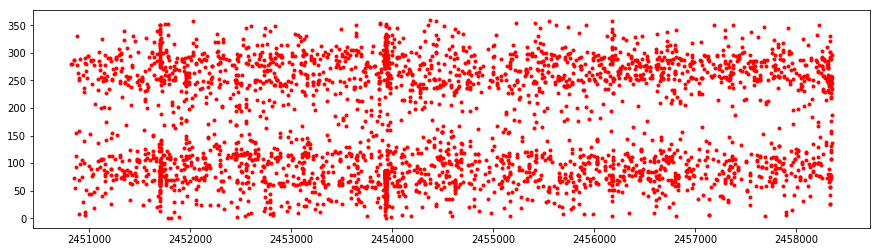

In [16]:
fig = plt.figure(figsize=(15,4))
plt.plot(t_jd[:-1], az[:-1]*180/np.pi, 'r.')

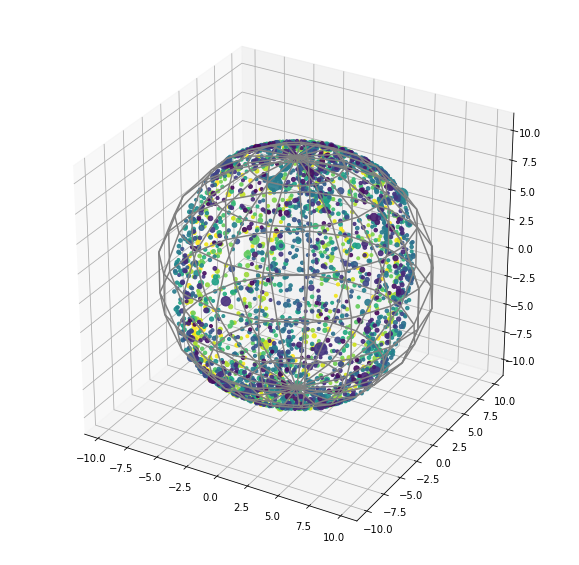

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

r = 10
al = alt+(np.pi/2)
xs = r*np.sin(al)*np.cos(az)
ys = r*np.sin(al)*np.sin(az)
zs = r*np.cos(al)
ax.scatter(xs, ys, zs, c=t_jd, marker='o', alpha=0.9, s=0.1*np.exp(mag))

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r*np.cos(u)*np.sin(v)
y = r*np.sin(u)*np.sin(v)
z = r*np.cos(v)
ax.plot_wireframe(x, y, z, color="gray")

# al = np.random.uniform(0, np.pi, 1000)
# azi = np.random.uniform(0, 2*np.pi, 1000)
# xa = r*np.sin(al)*np.cos(azi)
# ya = r*np.sin(al)*np.sin(azi)
# za = r*np.cos(al)
# ax.scatter(xa, ya, za, c="blue", marker='.')

plt.show()

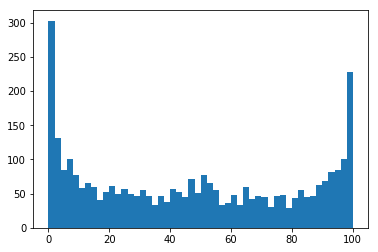

In [25]:
plt.hist(phase, bins=50);

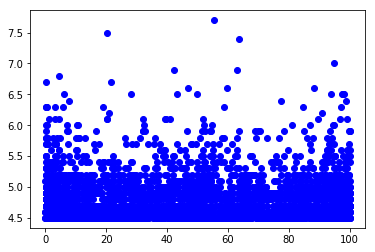

In [19]:
plt.plot(phase, mag, 'bo')

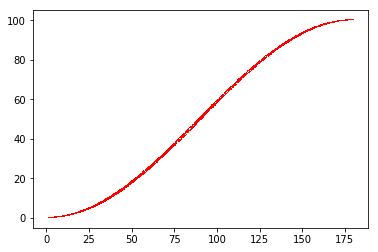

In [27]:
plt.plot(angleToSun*180/np.pi, phase, 'r,');

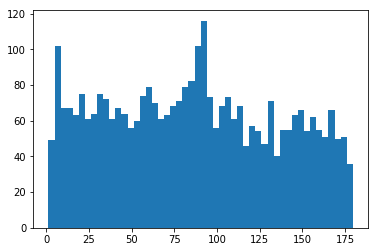

In [34]:
plt.hist(angleToSun*180/np.pi, bins=50);

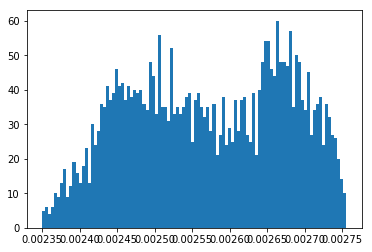

In [38]:
plt.hist(earthdist, bins=100);

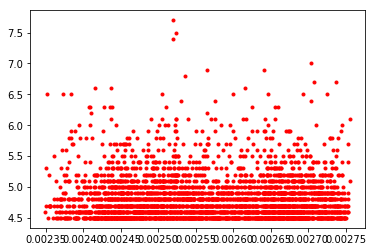

In [37]:
plt.plot(earthdist, mag, 'r.')